In [21]:
import feather
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from py2neo import Graph

In [34]:
df = pd.read_csv('data/credit_transactions.csv')

In [37]:
df.to_csv('data/credit_transactions.csv.gz', compression='gzip')

## EDA

In [38]:
df = feather.read_dataframe('data/credit_transactions.feather')

In [39]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


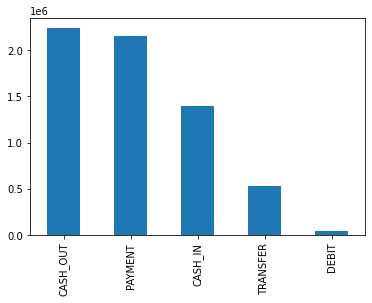

In [9]:
df['type'].value_counts().plot(kind="bar");

In [14]:
df['nameOrig'].nunique()/len(df)

0.9985362947967975

In [15]:
df['nameDest'].nunique()/len(df)

0.4278680795018404

(<AxesSubplot:>,)

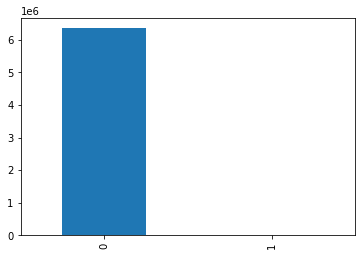

In [27]:
df['isFraud'].value_counts().plot(kind='bar'),

In [28]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [29]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<AxesSubplot:xlabel='amount', ylabel='Count'>

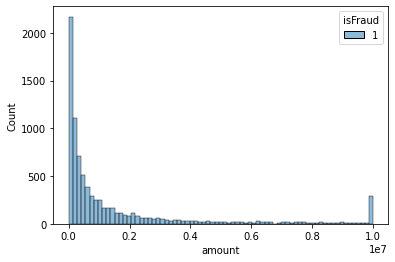

In [41]:
sns.histplot(x='amount', hue='isFraud', data=df[df['isFraud']==1])

In [45]:
# Attention
df[(df['isFraud']==1) & (df['amount']>8e6)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
4441,4,CASH_OUT,10000000.0,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1,0
481250,19,TRANSFER,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.00,0.00,C1622860679,504326.62,10342417.90,1,0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362579,741,CASH_OUT,10000000.0,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0
6362580,741,TRANSFER,10000000.0,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362581,741,CASH_OUT,10000000.0,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0
6362582,741,TRANSFER,10000000.0,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


<AxesSubplot:xlabel='type'>

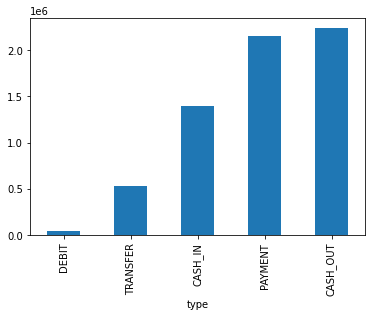

In [65]:
df.groupby('type').count()['isFraud'].sort_values(ascending=True).plot(kind="bar")

In [63]:
sns.barplot(x='type', y='isFraud', data=df)

KeyboardInterrupt: 

## Connecting to SandBox

In [30]:
## Credentials
#  bolt: bolt://3.95.245.105:7687
#  username: neo4j
#  password: hospital-inceptions-integrity

graph = Graph("bolt://3.95.245.105:7687", auth=("neo4j", "hospital-inceptions-integrity"))

![title](images/fraud_Graph.png)

In [ ]:
query = """
            CALL apoc.periodic.iterate(
            "CALL apoc.load.csv('https://raw.githubusercontent.com/BiaPri/Graph_Field/master/data/e_Commerce/customers.csv')
             YIELD map AS row RETURN row",
            "MERGE (c:Customer {id: toInteger(row.customer_id), name: row.customer_name, gender: row.gender, age: toInteger(row.age), state: row.state})",
             {batchSize: 100}
            )
        """

In [31]:
graph.run("""MATCH (n) RETURN n""").to_data_frame()

""
